<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the customer tip dataset and print the first five observations

In [15]:
df = pd.read_csv('Classroom Sessions Notebooks & other GL shared docs/customer_tip.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. What is the percentage of males and females in the dataset? and display it in the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

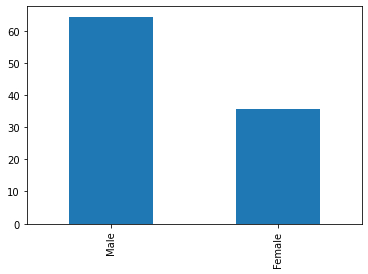

In [25]:
(df['sex'].value_counts(normalize = True)*100).plot(kind = 'bar')

In [36]:
(df['sex'].value_counts(normalize = True)*100)

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

In [ ]:
<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any relationship between tip and total bill amount? Support your answer with a plot
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


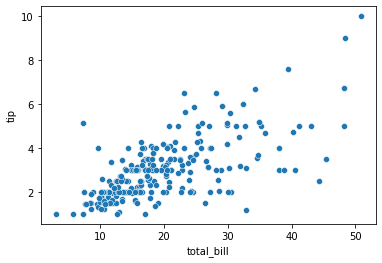

In [26]:
sns.scatterplot(df['total_bill'],df['tip'], data = df)
plt.show()
# It is a non-linear relationship with outliers at higher magnitude. 
# Max data points lies in the range of 10-25 USD of total_bill and 2-4 USD of tip.(high dense region)   

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Which is the busiest day and time at the restaurant?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

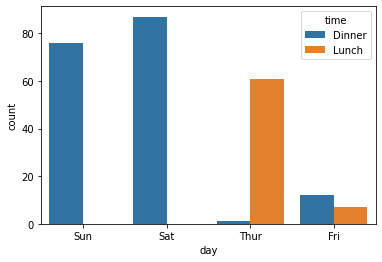

In [28]:
sns.countplot(x = 'day',data = df, hue = 'time') # Busiest day is Saturday
plt.show()

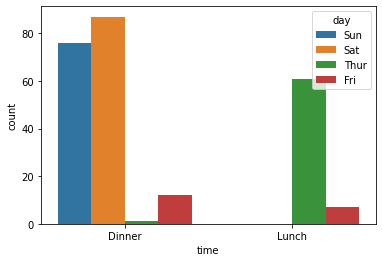

In [29]:
sns.countplot(x = 'time',data = df, hue = 'day') # Busiest time is Dinner
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Compute the gender-wise count based on smoking habits</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
pd.crosstab(df['sex'], df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Compare the tip amount given for different days 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

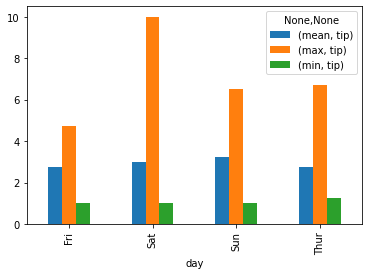

In [32]:
pd.pivot_table(df, index = 'day', values = 'tip', aggfunc = ['mean','max','min']).plot(kind = 'bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is the average bill amount dependent on the size of the group?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

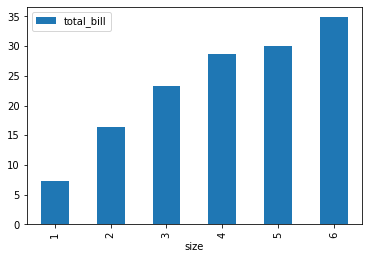

In [35]:
pd.pivot_table(df, index = 'size', values = 'total_bill', aggfunc = 'mean').plot(kind = 'bar')
plt.show()
# Yes it is dependent. As we can infer that with the increase in group size avg(total_bill) also increases.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is the tip amount varying based on gender and time?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

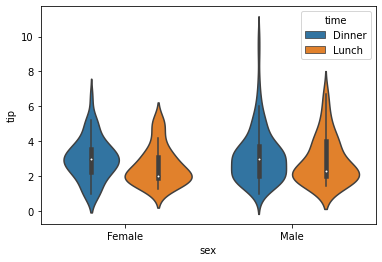

In [37]:
sns.violinplot(x = 'sex', y = 'tip', data = df, hue = 'time') # Yes. Highest tip is given by Male in Dinner
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Visualize the average bill amount for each day</b>
                </font>
            </div>
        </td>
    </tr>
</table>

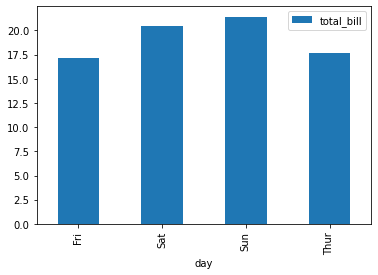

In [38]:
pd.pivot_table(df, index = 'day', values = 'total_bill', aggfunc = 'mean').plot(kind = 'bar')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Plot a horizontal boxplot to compare the bill amount based on gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

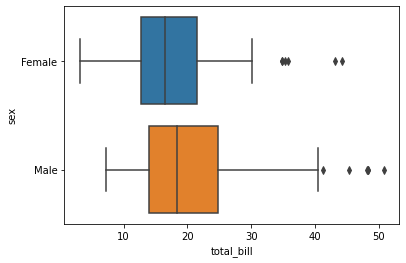

In [39]:
sns.boxplot(x = 'total_bill', y = 'sex', data =df)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the maximum bill amount for lunch and dinner on Saturday and Sunday </b>
                </font>
            </div>
        </td>
    </tr>
</table>

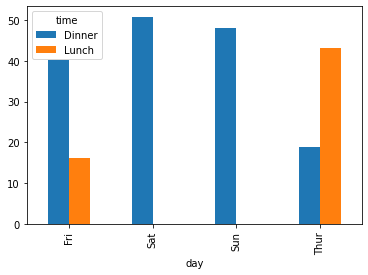

<Figure size 1296x3888 with 0 Axes>

In [41]:
pd.pivot_table(df, index ='day', values = 'total_bill', columns = 'time', aggfunc = 'max').plot(kind = 'bar')
plt.figure(figsize = [18,54])
plt.show()
# There are no one who visited for lunch on weekend
# Max. bill amount for dinner on weekend are 51 and 48 USD respectively.

In [42]:
df.groupby(['day','time'])['total_bill'].max()

day   time  
Fri   Dinner    40.17
      Lunch     16.27
Sat   Dinner    50.81
Sun   Dinner    48.17
Thur  Dinner    18.78
      Lunch     43.11
Name: total_bill, dtype: float64